# RSA, Generazione di numeri primi e pseudoprimi

@ Valerio Di Pasquale

## Introduzione

La scelta di questo algoritmo come primo argomento di studio è dovuta alla sua importanza storica e alla sua semplicità di comprensione. Inoltre, l'algoritmo RSA è alla base di molti altri algoritmi di crittografia, e la sua comprensione è quindi fondamentale per lo studio di questi ultimi.

Il sistema di crittografia si basa sull'esistenza di due chiavi distinte, che vengono usate per cifrare e decifrare. Se la prima chiave viene usata per la cifratura, la seconda deve necessariamente essere utilizzata per la decifratura e viceversa. La questione fondamentale è che, nonostante le due chiavi siano fra loro dipendenti, non è possibile risalire dall'una all'altra, in modo che se anche si è a conoscenza di una delle due chiavi, non si possa risalire all'altra, garantendo in questo modo l'integrità della crittografia.

## Storia

L'algoritmo RSA è stato ideato nel 1977 da Ron Rivest, Adi Shamir e Leonard Adleman, che hanno pubblicato il loro lavoro in un articolo intitolato "A Method for Obtaining Digital Signatures and Public-Key Cryptosystems". L'algoritmo prende il nome dalle iniziali dei cognomi dei tre autori.

L'algoritmo da loro inventato, denominato RSA dalle iniziali dei loro cognomi, non è sicuro da un punto di vista matematico teorico, in quanto esiste la possibilità che tramite la conoscenza della chiave pubblica si possa decifrare un messaggio; ma l'enorme mole di calcoli e l'enorme dispendio in termini di tempo necessario per trovare la soluzione fanno di questo algoritmo un sistema di affidabilità pressoché assoluta.

In [36]:
import random
import matplotlib.pyplot as plt
from time import time

## 🌱 Impostiamo un seme casuale
Impostiamo il seme per ottenere gli stessi risultati ogni volta che eseguiamo il codice, questo non è necessario, ma è utile per il debug.
Il seme che scegliamo è 42, ma può essere cambiato in qualsiasi altro numero o anche in una stringa. La motivazione per questo è perché [42 è la risposta alla domanda fondamentale sulla vita, l'universo e tutto](https://simple.wikipedia.org/wiki/42_(answer)).

In [37]:
# Setting a seed allows us to reproduce the same random numbers
random.seed(42)

## Generazione casuale di numeri primi

L'approccio che useremo è di generare un numero casuale su una data quantità di bit usando la funzione random.getrandbits(), e poi testare se è primo usando la funzione `is_prime(n: int)` che abbiamo definito, e poi ripetere questo processo finché non avremo generato un numero primo.

In [38]:
# Check if a number is prime
# Input: n
# Output: True if n is prime, False otherwise
def is_prime(n: int):
    '''Returns True if n is prime.'''
    # Check only odd numbers
    if n == 1:
        return False
    # Check if n is divisible by any number between 3 and sqrt(n)
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

# Miller-Rabin primality test
# Input: n, k
# Output: True if n is prime, False otherwise
def miller_rabin(n: int, k: int):
    '''Miller-Rabin primality test.'''
    # Check if n is even
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    r, s = 0, n - 1
    while s % 2 == 0:
        r += 1
        s //= 2
    for _ in range(k):
        a = random.randrange(2, n - 1)
        x = pow(a, s, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

# Generate a random prime number rapresentable on n bits using random.getrandbits
# Input: n
# Output: p
def random_prime(n: int, primality_test: str = 'default'):
    '''Returns a random prime number rapresentable on n bits.'''
    p = random.getrandbits(n)
    match primality_test:
        case 'default':
            while not is_prime(p):
                p = random.getrandbits(n)
        case 'miller-rabin':
            while not miller_rabin(p, 40):
                p = random.getrandbits(n)
    return p

### Valutazione di questo metodo di generazione

L'esperimento che abbiamo fatto per stimare il tempo necessario per generare un numero primo casuale è il seguente:

Generiamo 15 numeri primi per ogni $n$ nell'intervallo $[1, 55]$, dove $n$ è il numero di bit usati per rappresentare il numero, e calcoliamo il tempo medio, minimo e massimo necessario per generare ogni numero primo.

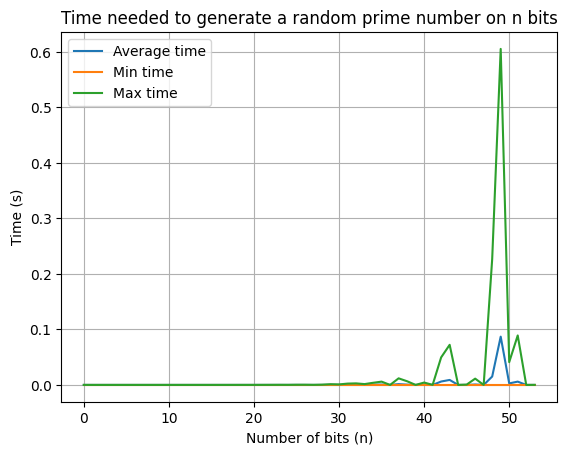

In [60]:
# Calculate the time needed to generate a random prime number rapresentable on n bits and plot the results
# Do the experiments m times for each n and calculate the average, the minimum and the maximum time for each n

# Input: n, m
# Output: None
def evaluate_random_prime_generation(n: int, m: int):
    '''
    Calculates the time needed to generate a random prime number rapresentable on n bits and plots the results.
    Do the experiments m times for each n and calculate the average, the minimum and the maximum time for each n.
    '''
    # Initialize the lists that will contain the results
    average_time = []
    min_time = []
    max_time = []
    # Do the experiments m times for each n
    for i in range(2, n + 1):
        # Initialize the lists that will contain the results for each n
        times = []
        for j in range(m):
            # Calculate the time needed to generate a random prime number rapresentable on i bits
            start_time = time()
            random_prime(i)
            end_time = time()
            times.append(end_time - start_time)
        # Calculate the average, the minimum and the maximum time for each n
        average_time.append(sum(times) / m)
        min_time.append(min(times))
        max_time.append(max(times))
    # Plot the results
    plt.plot(average_time, label='Average time')
    plt.plot(min_time, label='Min time')
    plt.plot(max_time, label='Max time')
    plt.xlabel('Number of bits (n)')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.title('Time needed to generate a random prime number on n bits')
    plt.grid()
    plt.show()

# We are ignoring the fact that this number of bits is not enough to ensure
# the security of the RSA algorithm, we will discuss this later
evaluate_random_prime_generation(55, 15)

Sulla base dei risultati dell'esperimento precedente, possiamo vedere che il tempo necessario per generare un numero primo casuale rappresentabile su $n$ bit è proporzionale a $n^2$. Presumiamo che il tempo necessario per generare un numero primo casuale su 1024 bit utilizzando questo metodo sarebbe **elevatissimo**. Se utilizzassimo questo algoritmo per generare numeri primi su 1024 bit, non riusciremo a generare una coppia di chiavi RSA entro il prossimo anno, la scelta per questo motivo cade banalmente sull'utilizzo del metodo di generazione di numeri primi di [Miller-Rabin](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test).

## Generazione della coppia di chiavi

In [40]:
l = 2048

# Setting the number of bites used by the algorithm
n_bits = l // 2

1. Si scelgo a caso due numeri primi $p$ e $q$ abbastanza grandi da garantire la sicurezza dell'algoritmo.

In [56]:
p, q = random_prime(n_bits, 'miller-rabin'), random_prime(n_bits, 'miller_rabin')

2. Si calcola il loro prodotto $n = pq$, chiamato modulo...

In [57]:
n = p * q
n

24752535927740214287601221602502651598781868775030803722133333235685349226086885518033864919950478070228512589071965108013192310256050663693265161199304603043168413866086759507266789595823053134802070365965185755202537450957722316432228991900932949151968074226469420727686717708007928248587456711965928907520509389246800934754380554856560580929596868263287643818818852783590295385440314268474478244790650865923508353775122118139505818861390242779926667508279716382925603920564457291840064422677969393499987291334467540111829004201265255129047227629828618380063050546820195330460147836815987251712764504288086815896253

...e il prodotto $\phi = (p - 1) (q - 1)$, dove $\phi$ è la funzione toziente.

La sicurezza dell'algoritmo sta nel fatto che per calcolare $d$ da $e$ (o viceversa) non basta conoscere $n$, ma serve il numero $\phi = (p - 1) (q - 1)$, e che il suo calcolo richiede tempi elevati; infatti, **fattorizzare in numeri primi** (cioè scomporre un numero nei suoi divisori primi) **è un problema computazionalmente difficile**.

In [43]:
# Calculate the totient of n
# Input: p, q
# Output: phi
def totient(p: int, q: int):
    '''
    Returns the totient of n.

    p is the first prime number.

    q is the second prime number.
    '''
    return (p - 1) * (q - 1)

phi = totient(p, q)
phi

3286668022640794172125106095913568423387840656921021880703229557361441713319715563581838661012594711234749016892394907822940416165571465659172643786543939445922287164338820424186673735578146357515205319406347505386543033439476690209346619822019512585722967266016898327077797446885009515085382144133608127467305736443549135247502090685110624244907172919277991807819433047081964078985881184178954438912697117089147898406367728343611131424109829463708766779334343422073370359596317923283794155209357266403088072884615522887782973243473943009829876622588942422707274206940087170847751076318298214027434327496581369374786

3. Si considera che la fattorizzazione di n è segreta e solo chi sceglie i due numeri primi, p e q, la conosce.
4. Si sceglie poi un numero $e$ (chiamato esponente pubblico), coprimo con $\phi(n)$ e minore di $\phi$(n).
5. si calcola il numero $d$ (chiamato esponente privato) tale che il suo prodotto con $e$ e sia congruo a 1 modulo $\phi(n)$, cioè $ed \equiv 1 \pmod{\phi(n)}$; per calcolare $d$ si può fare uso dell'algoritmo di Euclide esteso.

Per la scelta di $e$, non abbiamo alcun problema nello scegliere sempre lo stesso numero (in quanto questo andrà a comporre la chiave pubblica), infatti, scelte popolari per questo numero sono $3$ e $2^{16}+1$ = $65537$.

In [44]:
# Calculate e and d
# Input: p, q
# Output: e, d
def calculate_e_d(p: int, q: int):
    '''
    Returns e and d.

    e is the public key exponent.
    
    d is the private key exponent.
    '''
    phi = totient(p, q)
    e = 2**16 + 1
    d = pow(e, -1, phi)
    return e, d

e, d = calculate_e_d(p, q)
e, d

(65537,
 508318462509530337498818612206538742076371406969368109355141901420809210159278528960213568946147367030462426342696717666254544123994573689997618405181948673632731170144167169988802126795857171975740743663926305973694251902628068601888053138166070762605673073353178837042595097755870064923713832078646443688429603805359019101708671302993443205309658737961788378535144626168771654250284445165904484380107389395541497142788704006757136092814398453456094421095456077118813524648187717936502091295024875295813062953117520484467830642169337722929576108863108173956100086386998543780044935068164101154799187382781463295281)

### Definiamo le classi Python che descriveranno le nostre chiavi

In [45]:
from abc import ABC

class Key(ABC):
    '''Class that represents a key.'''
    def __init__(self, n, e_or_d):
        self.n = n
        self.e_or_d = e_or_d

    def __str__(self):
        '''Returns a string representation of the key.'''
        return f'Key(n={self.n}, e_or_d={self.e_or_d})'

class PublicKey(Key):
    '''Class that represents a public key.'''
    def __init__(self, n, e):
        super().__init__(n, e)

    @property
    def e(self):
        '''Returns the public key exponent.'''
        return self.e_or_d

    def __str__(self):
        '''Returns a string representation of the public key.'''
        return f'PublicKey(n={self.n}, e={self.e_or_d})'

class PrivateKey(Key):
    '''Class that represents a private key.'''
    def __init__(self, n, d):
        super().__init__(n, d)

    @property
    def d(self):
        '''Returns the private key exponent.'''
        return self.e_or_d

    def __str__(self):
        '''Returns a string representation of the private key.'''
        return f'PrivateKey(n={self.n}, d={self.e_or_d})'

### Uniamo il tutto

Ora uniamo tutto il codice scritto finora in una unica funzione che ci permette di generare una coppia di chiavi RSA e le restituisce.

In [46]:
# Wrap all together to generate a public key and a private key
# Input: n_bits
# Output: public_key, private_key
def generate_key_pair(n_bits: int):
    '''Returns a public key and a private key.'''
    p, q = random_prime(n_bits, 'miller-rabin'), random_prime(n_bits, 'miller-rabin')   # Generate two random prime numbers
    n = p * q                                           # Calculate n
    e, d = calculate_e_d(p, q)                          # Calculate e and d
    return PublicKey(n, e), PrivateKey(n, d)            # Return a public key and a private key

In [59]:
# Generate the public and private keys
pk, sk = generate_key_pair(n_bits)
print(pk)
print(sk)

PublicKey(n=11104106665857700875347062758499510432192923929625874430745907757709385861502636489612385515051173352597760962826408451880630828324877866642687156911705282699597027352030363298536601957897300925584085527116561846898341563704908013986651656815829368792738437864924102557564473952967201126798571254383494076709401280267235733891999210425220057554502163715852924700558246231882200075303603993436918672174556199211462937847086266073330713934190016899412651453550848894461517164464209138871777238236520025740458532660083072276669637811095329263160183303310647281016237445380298141124211861316412322280186700502480241155231, e=65537)
PrivateKey(n=11104106665857700875347062758499510432192923929625874430745907757709385861502636489612385515051173352597760962826408451880630828324877866642687156911705282699597027352030363298536601957897300925584085527116561846898341563704908013986651656815829368792738437864924102557564473952967201126798571254383494076709401280267235733891999210425220057554502

### Funzioni di Crittografia e Decrittografia

In [48]:
def encrypt(message: str, pk: PublicKey):
    '''
    Returns the encrypted message.

    message is the message to encrypt.

    pk is the public key.
    '''
    # Convert the message to bytes
    return pow(int.from_bytes(message.encode(), 'big'), pk.e, pk.n)

def decrypt(encrypted_message: int, sk: PrivateKey):
    '''
    Returns the decrypted message.

    encrypted_message is the message to decrypt.

    sk is the private key.
    '''
    # Decrypt the message
    decrypted_message = pow(encrypted_message, sk.d, sk.n)
    # Convert the message to a string
    return decrypted_message.to_bytes((decrypted_message.bit_length() + 7) // 8, 'big').decode()

### Let's test it

### Blackbox testing

The data used for the testing is extrapolated from "The Sonnets" of William Shakespeare.

In [49]:
%%time
with open('shakespeare.txt', 'r') as f:
    print(f'@ Number of lines: {len(f.readlines())}')
    f.seek(0)
    for i, line in enumerate(f):
        encrypted_message = encrypt(line, pk)
        decrypted_message = decrypt(encrypted_message, sk)
        if not line == decrypted_message:
            print(f'- The message is not the same as the decrypted message in line {i + 1}')
        elif not i % 1:
            print(f'+ Line {i + 1}: {line}', end='')
        if i == 10:
            break

@ Number of lines: 2469
+ Line 1: THE SONNETS
+ Line 2: 
+ Line 3: by William Shakespeare
+ Line 4: 
+ Line 5: From fairest creatures we desire increase,
+ Line 6: That thereby beauty's rose might never die,
+ Line 7: But as the riper should by time decease,
+ Line 8: His tender heir might bear his memory:
+ Line 9: But thou contracted to thine own bright eyes,
+ Line 10: Feed'st thy light's flame with self-substantial fuel,
+ Line 11: Making a famine where abundance lies,
CPU times: user 360 ms, sys: 3.36 ms, total: 363 ms
Wall time: 363 ms


### Testing manuale

In [50]:
message = "Hello World!"

# Check if the encryption works

encrypted_message = encrypt(message, pk)
# If we try to print the encrypted message, we get an unreadable string
encrypted_message # The encrypted message is a number

5607024050299834952240587498717046094405673713629751703632088206586643568912047260324059523822093393377948509969432970588398288384032329939915646142929019863633389048753872470207995887317177614285894543876966868805046597782588992839624789810637594353236788409066054720940524477615841180640079917712870286318569379732461797546531551087220652621988218119359168603592269914543410838835821857447857444993249096354919580831408771436197383386675507556904093726785730691303908965043128299259641254177990354442774009931264378869725597186796767190388954415429291007307547123431371490076586198768170245559125925523584946465849

In [51]:
# Check if the message is correctly decrypted
decrypted_message = decrypt(encrypted_message, sk)
decrypted_message

'Hello World!'

## Conclusioni

RSA è computazionalmente impegnativo, soprattutto per quanto riguarda una eventuale realizzazione hardware. Di conseguenza, un uso efficiente è quello di sfruttare RSA per codificare un unico messaggio contenente una chiave segreta; tale chiave verrà poi utilizzata per scambiarsi messaggi tramite un algoritmo a chiave simmetrica, come AES.